# After-Market Feature Engineering

Goal: Create an after-market price feature.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

import lego_helper as lh

## Import Data

In [4]:
FINAL_FILE = 'data/brickset_final.csv'

In [5]:
set_df = pd.read_csv(FINAL_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,price_store,price_new,price_used,rating_value,rating_votes,number_parts,total_parts,number_colors,1st_color,2nd_color
0,1591-1,Danone Delivery Truck,Modern day,Town,Special,1980.0,40.0,0.0,NaN,129.0,28.0,NaN,NaN,19,40,4,White,Blue
1,1592-1,Town Square - Castle Scene,Modern day,Town,Classic,1980.0,471.0,11.0,NaN,1168.0,235.0,4.8,4.0,133,495,10,Black,Yellow
2,1651-2,Maersk Line Container Lorry,Modern day,Town,Special,1980.0,305.0,1.0,NaN,NaN,444.0,5.0,1.0,66,305,9,Maersk Blue,Light Gray
3,6305-1,Trees and Flowers,Modern day,Town,Accessories,1980.0,12.0,0.0,3.75,28.0,10.0,4.3,4.0,6,24,4,Green,Red
4,6306-1,Road Signs,Modern day,Town,Accessories,1980.0,12.0,0.0,2.50,49.0,13.0,4.0,3.0,10,12,1,White,White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 18 columns):
set_no           3213 non-null object
name             3213 non-null object
theme_group      3213 non-null object
theme            3213 non-null object
subtheme         2667 non-null object
year             3213 non-null float64
piece_cnt        3212 non-null float64
minifig_cnt      3213 non-null float64
price_store      2762 non-null float64
price_new        3098 non-null float64
price_used       3140 non-null float64
rating_value     3001 non-null float64
rating_votes     3001 non-null float64
number_parts     3213 non-null int64
total_parts      3213 non-null int64
number_colors    3213 non-null int64
1st_color        3213 non-null object
2nd_color        3213 non-null object
dtypes: float64(8), int64(3), object(7)
memory usage: 451.9+ KB


## Investigate Surviving Sets

In [6]:
set_df['theme_group'].value_counts()

Modern day          1027
Licensed             816
Action/Adventure     594
Historical           337
Model making         279
Racing               160
Name: theme_group, dtype: int64

In [7]:
# there are too many themes, use the groups instead

set_df['theme'].value_counts().shape

(70,)

In [8]:
InteractiveShell.ast_node_interactivity = 'last'

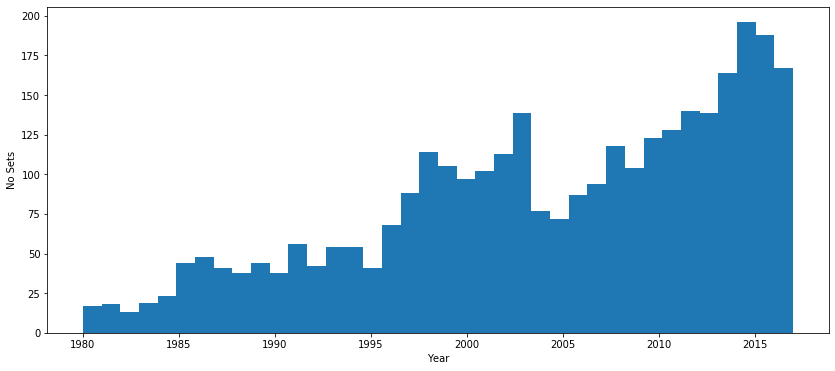

In [9]:
# sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
plt.show()

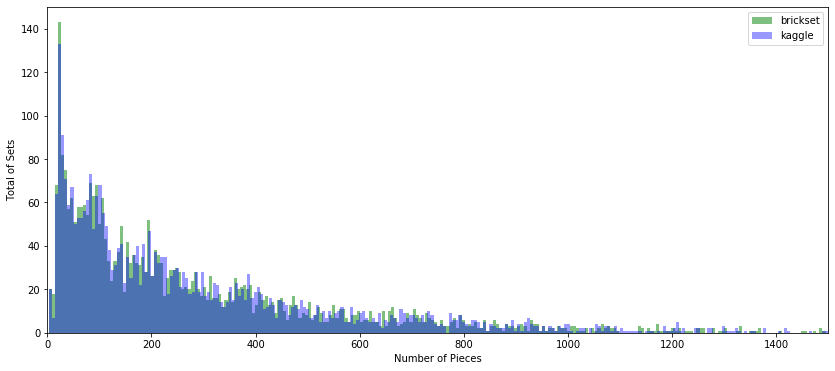

In [10]:
# piece count distribution brickset vs kaggle

piece_df = set_df.loc[(set_df['piece_cnt']>=1) & (set_df['total_parts']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.set(xlabel='Number of Pieces', ylabel='Total of Sets', xlim=(0, 1500))

axs.hist(piece_df['piece_cnt'].values, bins=1000, color='green', label='brickset', alpha=.5)
axs.hist(piece_df['total_parts'].values, bins=1000, color='blue', label='kaggle', alpha=.4)

plt.legend()
plt.show()

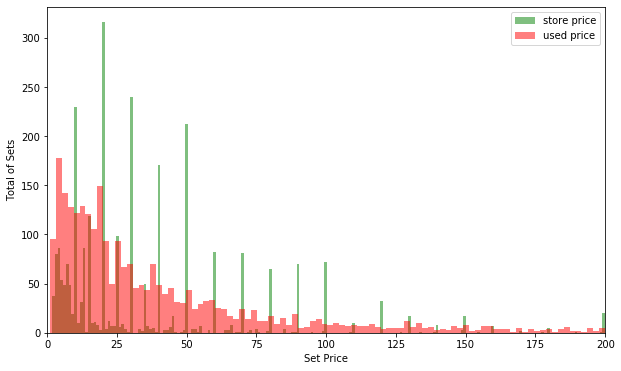

In [11]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

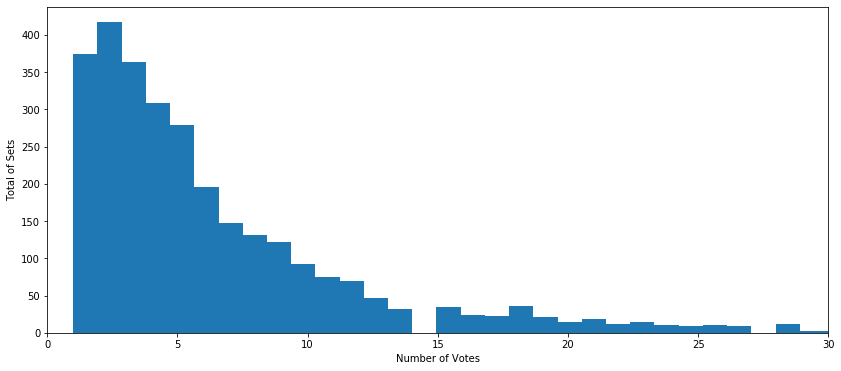

In [12]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

votes_df = set_df.loc[set_df['rating_votes'].isna()==False]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(votes_df['rating_votes'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

## Introduce New Features

In [13]:
# create a popularity column, new feature for ratings

set_df['popularity'] = set_df['rating_value'] * set_df['rating_votes']
set_df['popularity'].head()

0     NaN
1    19.2
2     5.0
3    17.2
4    12.0
Name: popularity, dtype: float64

In [14]:
# visualize the popularity

popularity_df = set_df.loc[set_df['popularity'].isna()==False]
popularity_df.shape

(3001, 19)

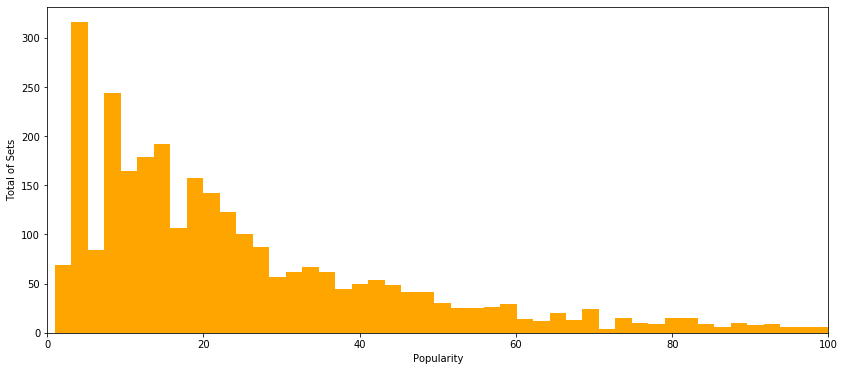

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))

axs.hist(popularity_df['popularity'].values, bins=200, color='orange')
axs.set(xlabel='Popularity', ylabel='Total of Sets', xlim=(0, 100))  

plt.show()

In [16]:
# create new columns for super-colors 

set_df['scolor_1st'] = set_df['1st_color'].apply(lh.get_super_color)
set_df['scolor_2nd'] = set_df['2nd_color'].apply(lh.get_super_color)
set_df[['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd']].head()

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
0,1591-1,Danone Delivery Truck,Town,White,White,Blue,Blue
1,1592-1,Town Square - Castle Scene,Town,Black,Black,Yellow,Yellow
2,1651-2,Maersk Line Container Lorry,Town,Maersk Blue,Blue,Light Gray,Gray
3,6305-1,Trees and Flowers,Town,Green,Green,Red,Red
4,6306-1,Road Signs,Town,White,White,White,White


In [17]:
# check for any remaining gaps

set_df.loc[ (set_df['scolor_1st'].isna()) | (set_df['scolor_2nd'].isna()), 
            ['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd'] ]

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
1304,3560-1,NBA Collectors # 1,Sports,Tan,Tan,[No Color],None
1306,3562-1,NBA Collectors # 3,Sports,Tan,Tan,[No Color],None
1309,3565-1,NBA Collectors # 6,Sports,Tan,Tan,[No Color],None
1310,3566-1,NBA Collectors # 7,Sports,Tan,Tan,[No Color],None


In [18]:
# fix secondary colors by assigning primary color

set_df['scolor_2nd'] = set_df['scolor_2nd'].fillna(set_df['scolor_1st'])
set_df.loc[(set_df['scolor_2nd'].isna())]

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,price_store,price_new,...,rating_value,rating_votes,number_parts,total_parts,number_colors,1st_color,2nd_color,popularity,scolor_1st,scolor_2nd


In [19]:
set_df['scolor_1st'].value_counts()

Black          1219
Gray            720
White           569
Red             203
Yellow          158
Blue            116
Brown           101
Tan              75
Green            46
Transparent       6
Name: scolor_1st, dtype: int64

In [20]:
# for after-market analysis, filter by store price and used price

set_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]
set_df.head()
set_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 3 to 3212
Data columns (total 21 columns):
set_no           2723 non-null object
name             2723 non-null object
theme_group      2723 non-null object
theme            2723 non-null object
subtheme         2222 non-null object
year             2723 non-null float64
piece_cnt        2723 non-null float64
minifig_cnt      2723 non-null float64
price_store      2723 non-null float64
price_new        2700 non-null float64
price_used       2723 non-null float64
rating_value     2601 non-null float64
rating_votes     2601 non-null float64
number_parts     2723 non-null int64
total_parts      2723 non-null int64
number_colors    2723 non-null int64
1st_color        2723 non-null object
2nd_color        2723 non-null object
popularity       2601 non-null float64
scolor_1st       2723 non-null object
scolor_2nd       2723 non-null object
dtypes: float64(9), int64(3), object(9)
memory usage: 468.0+ KB


In [21]:
set_df['aftermarket'] = set_df['price_used'] - set_df['price_store']
set_df.head()

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,price_store,price_new,...,rating_votes,number_parts,total_parts,number_colors,1st_color,2nd_color,popularity,scolor_1st,scolor_2nd,aftermarket
3,6305-1,Trees and Flowers,Modern day,Town,Accessories,1980.0,12.0,0.0,3.75,28.0,...,4.0,6,24,4,Green,Red,17.2,Green,Red,6.25
4,6306-1,Road Signs,Modern day,Town,Accessories,1980.0,12.0,0.0,2.50,49.0,...,3.0,10,12,1,White,White,12.0,White,White,10.50
7,6375-2,Exxon Gas Station,Modern day,Town,Shops and Services,1980.0,267.0,3.0,20.00,NaN,...,5.0,95,272,12,White,Red,24.0,White,Red,53.00
8,6390-1,Main Street,Modern day,Town,Shops and Services,1980.0,591.0,8.0,40.00,NaN,...,5.0,156,614,11,Red,White,23.0,Red,White,210.00
17,6077-1,Knight's Procession,Historical,Castle,Classic,1981.0,48.0,6.0,5.00,NaN,...,1.0,21,49,6,Light Gray,Black,4.0,Gray,Black,38.00


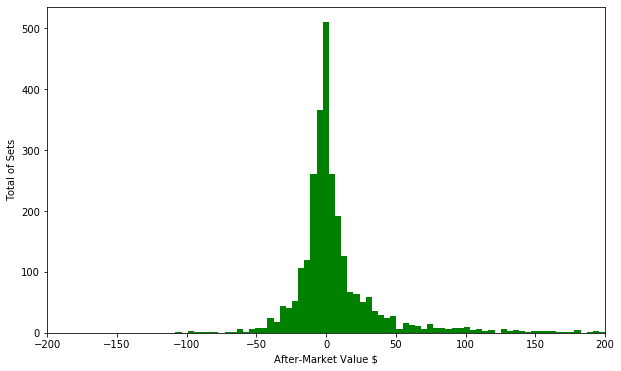

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')

axs.hist(set_df['aftermarket'].values, bins=200, color='green')
axs.set(xlabel='After-Market Value $', ylabel='Total of Sets', xlim=(-200, 200))  

plt.show()

In [23]:
set_df.loc[ set_df['aftermarket']>0 ].shape

(1362, 22)

In [24]:
set_df.loc[ set_df['aftermarket']==0 ].shape

(53, 22)

In [25]:
set_df.loc[ set_df['aftermarket']<0 ].shape

(1308, 22)

In [26]:
set_df.loc[ set_df['aftermarket']<=0 ][['set_no', 'name', 'price_used', 'price_store', 'aftermarket']].head()

,set_no,name,price_used,price_store,aftermarket
198,6381-1,Motor Speedway,19.0,23.0,-4.0
205,6641-1,4-Wheelin' Truck,5.0,6.5,-1.5
238,6357-1,Stunt 'Copter N' Truck,13.0,17.0,-4.0
246,6642-1,Police Helicopter,7.0,15.0,-8.0
290,6526-1,Red Line Racer,4.0,4.0,0.0


In [31]:
set_df.groupby(['year']).count()['set_no']

year
1980.0      4
1981.0      4
1982.0      1
1983.0      1
1984.0     11
1985.0     10
1986.0     13
1987.0     16
1988.0     17
1989.0     30
1990.0     24
1991.0     33
1992.0     32
1993.0     44
1994.0     36
1995.0     34
1996.0     63
1997.0     67
1998.0     80
1999.0     81
2000.0     81
2001.0     88
2002.0    105
2003.0    113
2004.0     69
2005.0     58
2006.0     81
2007.0     92
2008.0    112
2009.0    103
2010.0    122
2011.0    127
2012.0    139
2013.0    136
2014.0    164
2015.0    193
2016.0    183
2017.0    156
Name: set_no, dtype: int64

In [34]:
increase_df = set_df.loc[set_df['aftermarket']>0]

increase_df.shape

(1362, 22)

In [35]:
decrease_df = set_df.loc[set_df['aftermarket']<=0]

decrease_df.shape

(1361, 22)

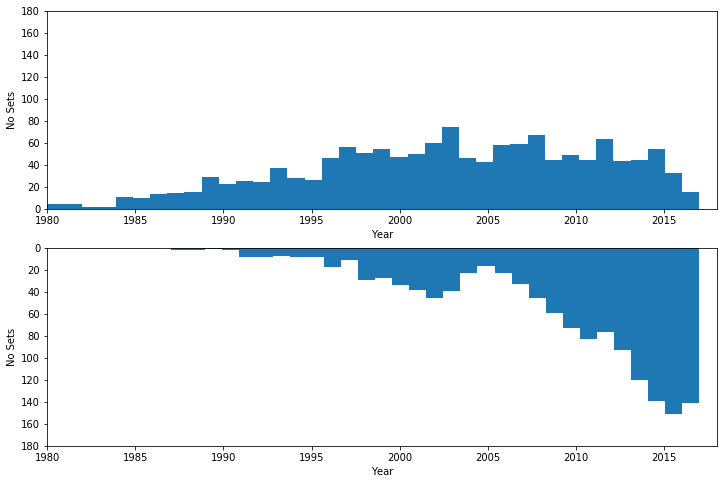

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].hist(increase_df['year'].values, bins=increase_df['year'].unique().shape[0])
axs[0].set(xlabel='Year', ylabel='No Sets', xlim=(1980, 2018), ylim=(0, 180))

axs[1].hist(decrease_df['year'].values, bins=decrease_df['year'].unique().shape[0])
axs[1].set(xlabel='Year', ylabel='No Sets', xlim=(1980, 2018), ylim=(0, 180))
axs[1].set_ylim(axs[1].get_ylim()[::-1])

plt.show()

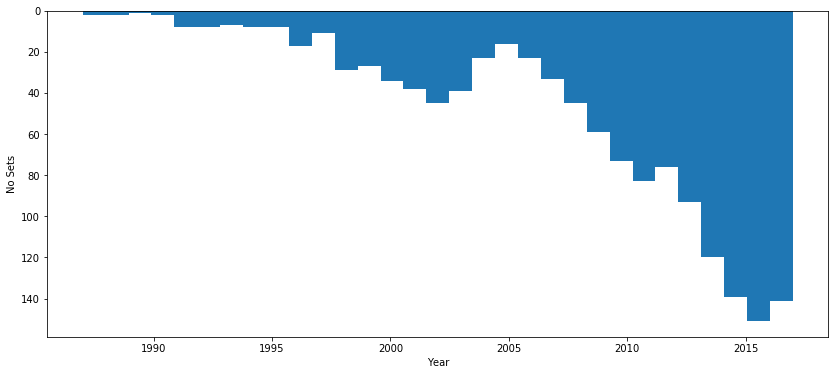

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(decrease_df['year'].values, bins=decrease_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
axs.set_ylim(axs.get_ylim()[::-1])
plt.show()

## Clean Features Dataset

In [27]:
set_clean_df = set_df[['set_no', 'name', 
                       'price_store', 'price_used', 'popularity', 'aftermarket', 
                       'theme_group', 'theme', 'year', 'total_parts', 'number_parts', 
                       'number_colors', 'scolor_1st', 'scolor_2nd']]
set_clean_df.head()

,set_no,name,price_store,price_used,popularity,aftermarket,theme_group,theme,year,total_parts,number_parts,number_colors,scolor_1st,scolor_2nd
3,6305-1,Trees and Flowers,3.75,10.0,17.2,6.25,Modern day,Town,1980.0,24,6,4,Green,Red
4,6306-1,Road Signs,2.50,13.0,12.0,10.50,Modern day,Town,1980.0,12,10,1,White,White
7,6375-2,Exxon Gas Station,20.00,73.0,24.0,53.00,Modern day,Town,1980.0,272,95,12,White,Red
8,6390-1,Main Street,40.00,250.0,23.0,210.00,Modern day,Town,1980.0,614,156,11,Red,White
17,6077-1,Knight's Procession,5.00,43.0,4.0,38.00,Historical,Castle,1981.0,49,21,6,Gray,Black


In [28]:
set_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 3 to 3212
Data columns (total 14 columns):
set_no           2723 non-null object
name             2723 non-null object
price_store      2723 non-null float64
price_used       2723 non-null float64
popularity       2601 non-null float64
aftermarket      2723 non-null float64
theme_group      2723 non-null object
theme            2723 non-null object
year             2723 non-null float64
total_parts      2723 non-null int64
number_parts     2723 non-null int64
number_colors    2723 non-null int64
scolor_1st       2723 non-null object
scolor_2nd       2723 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 319.1+ KB


In [29]:
save_path = r'data/brickset_aftermarket.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'

'0.28 mb'